<a href="https://colab.research.google.com/github/eemaansheikh/Data_Science_2025/blob/main/Copy_of_Unit2Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question: What is the probaility that a Mexican restaurant in downtown Austin can atttain a 4.5 rating or above?**

Using a data set of the ratings of 50 mexican restaurants in downtown Austin, 38% of restaurants had a 4.5 or higher (or 19 restaurants in the 50 number set).

Numerically:

p = 38%

k = 19

n = 50

**Prior & Likelihood**

<Axes: >

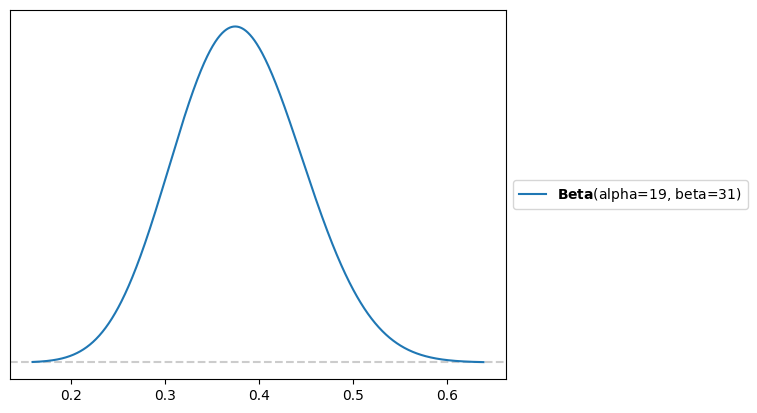

In [5]:
##19 of 50 qualify, 31 of 50 don't
#theta ~ Beta(a=19, b=31)

#!pip install preliz

import preliz as pz
import numpy as np
import arviz as az
import pymc as pm

#plotting the beta distribution with shape parameter 19 and scale parameter 31
pz.Beta(alpha=19,beta=31).plot_pdf()

In [6]:
#"predicting wemby ft in 24/25"
#Restaurants in downtown ATX, with a rating of 4.5 or higher then not
MexRestaurant_Ratings_ATX = np.repeat([1,0], repeats = [19,31])

with pm.Model() as :
  #same prior from before based on Euroleague data
  θ = pm.Beta('θ' , alpha = 1.9 , beta = 3.1)

  #same likelihood, with our stand in for the binomial distribution
  #but with the updated data
  y = pm.Bernoulli('y', p = θ, observed = FT_data_2324)

  #sample from the posterior, 2000 for a more prcise picture later
  idata_FT_2324 = pm.sample(2000)

  az.plot_posterior(idata_FT_2324)

SyntaxError: invalid syntax (ipython-input-4119274076.py, line 5)

writeup!